In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delta = 0.0001
w0 = 0.01
EF = 1
m = 1
h_bar = 1
kF = np.sqrt(2*m*EF) / h_bar
xi_c = 2 * EF / (kF * delta)
l_0  = 2 * EF / (kF * h_bar * w0)
print(f'kF   = {kF}')
print(f'l_0  = {l_0}')
print(f'xi_c = {xi_c}')

kF   = 1.4142135623730951
l_0  = 141.42135623730948
xi_c = 14142.13562373095


In [3]:
from scipy.special import kv, modstruve, i1, iv

def G_integral_body(r, xs):
    sqrt_1_xsq = np.sqrt(1 + xs*xs)
    exp_1 = np.exp(-l_0 / xi_c * np.abs(xs))
    exp_2 = np.exp(1.j * r / xi_c * xs)
    return (sqrt_1_xsq - xs) / (2 * sqrt_1_xsq) * exp_1 * exp_2

def G_calc_integral(rs, N):
    xs = np.linspace(-EF / delta, EF / delta, N + 1)
    dx = 2 * EF / delta / N
    result = np.zeros(len(rs), dtype='complex')
    for i in range(len(rs)):
        result[i] = dx * np.sum(G_integral_body(rs[i], xs))
    return result

def G_approx_integral_1(rs):
    return xi_c * l_0 / (rs*rs + l_0*l_0)
def G_approx_integral_2(rs):
    return -1.j * np.real(kv(1, rs / xi_c - 1.j * l_0 / xi_c))
def G_approx_integral_3(rs):
    return -1.j * l_0 / xi_c * (np.pi / 2 * ((i1(rs / xi_c) - modstruve(1, rs / xi_c)) / (rs / xi_c) + iv(2, rs / xi_c) - modstruve(2, rs / xi_c)) - rs / (3 * xi_c))
def G_approx_integral_3_far(rs):
    return 2 * (rs > xi_c) * -1.j * l_0*xi_c*xi_c / rs**3
def G_approx_integral(rs):
    return (G_approx_integral_1(rs)
        + G_approx_integral_2(rs)
        + G_approx_integral_3(rs)
    )
def G_approx_integral_far(rs):
    return (G_approx_integral_1(rs)
        + G_approx_integral_2(rs)
        + G_approx_integral_3_far(rs)
    )

In [4]:
rs = np.linspace(0.001 * xi_c, 2 * xi_c, 100)

In [5]:
G_res = G_calc_integral(rs, 1_000_000)
G_res_re = np.real(G_res)
G_res_im = np.imag(G_res)

In [6]:
G_approx_res = G_approx_integral(rs)
G_approx_res_re = np.real(G_approx_res)
G_approx_res_im = np.imag(G_approx_res)

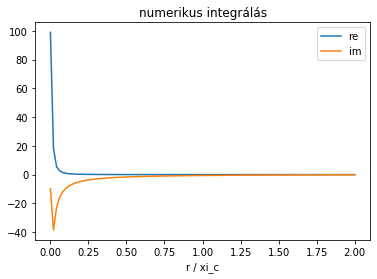

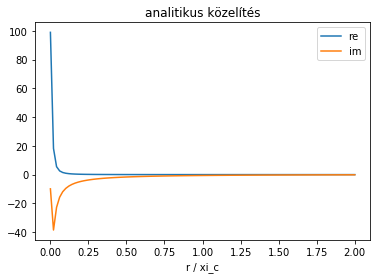

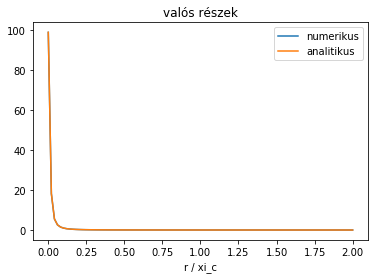

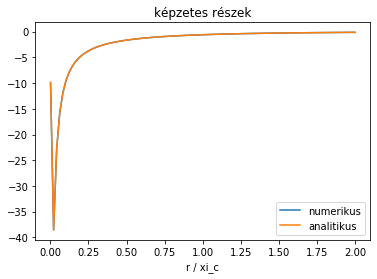

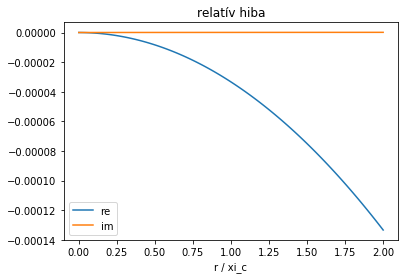

In [7]:
plt.figure(1)
plt.plot(rs / xi_c, G_res_re, label='re')
plt.plot(rs / xi_c, G_res_im, label='im')
plt.legend()
plt.title('numerikus integrálás')
plt.xlabel('r / xi_c')

plt.figure(2)
plt.plot(rs / xi_c, G_approx_res_re, label='re')
plt.plot(rs / xi_c, G_approx_res_im, label='im')
plt.legend()
plt.title('analitikus közelítés')
plt.xlabel('r / xi_c')

plt.figure(3)
plt.plot(rs / xi_c, G_res_re, label='numerikus')
plt.plot(rs / xi_c, G_approx_res_re, label='analitikus')
plt.legend()
plt.title('valós részek')
plt.xlabel('r / xi_c')

plt.figure(4)
plt.plot(rs / xi_c, G_res_im, label='numerikus')
plt.plot(rs / xi_c, G_approx_res_im, label='analitikus')
plt.legend()
plt.title('képzetes részek')
plt.xlabel('r / xi_c')

plt.figure(5)
plt.plot(rs / xi_c, (G_approx_res_re - G_res_re) / G_res_re, label='re')
plt.plot(rs / xi_c, (G_approx_res_im - G_res_im) / G_res_im, label='im')
plt.legend()
plt.title('relatív hiba')
plt.xlabel('r / xi_c')

plt.show()

In [8]:
delta = 0.0001
w0 = 0.01
EF = 1
m = 1
h_bar = 1
kF = np.sqrt(2*m*EF) / h_bar
xi_c = 2 * EF / (kF * delta)
l_0  = 2 * EF / (kF * h_bar * w0)
print(f'kF   = {kF}')
print(f'l_0  = {l_0}')
print(f'xi_c = {xi_c}')

kF   = 1.4142135623730951
l_0  = 141.42135623730948
xi_c = 14142.13562373095


In [9]:
from scipy.special import kv, i1, modstruve

def F_integral_body(r, xs):
    sqrt_1_xsq = np.sqrt(1 + xs*xs)
    exp_1 = np.exp(-l_0 / xi_c * np.abs(xs))
    exp_2 = np.exp(1.j * r / xi_c * xs)
    return 1 / (2 * sqrt_1_xsq) * exp_1 * exp_2

def F_calc_integral(rs, N):
    xs = np.linspace(-EF / delta, EF / delta, N + 1)
    dx = 2 * EF / delta / N
    result = np.zeros(len(rs), dtype='complex')
    for i in range(len(rs)):
        result[i] = dx * np.sum(F_integral_body(rs[i], xs))
    return result

def F_approx_integral_1(rs):
    return np.real(kv(0, rs / xi_c + 1.j * l_0 / xi_c))
def F_approx_integral_2(rs):
    return l_0 / xi_c * np.pi / 2 * (modstruve(-1, rs / xi_c) - i1(rs / xi_c))
def F_approx_integral_2_far(rs):
    return (rs > xi_c) * l_0 * xi_c / (rs*rs)
def F_approx_integral(rs):
    return F_approx_integral_1(rs) + F_approx_integral_2(rs)
def F_approx_integral_far(rs):
    return F_approx_integral_1(rs) + F_approx_integral_2_far(rs)

In [10]:
rs = np.linspace(0.001 * xi_c, 10 * xi_c, 100)

In [11]:
F_res = F_calc_integral(rs, 10_000_000)
F_res_re = np.real(F_res)
F_res_im = np.imag(F_res)

In [12]:
F_approx_res = F_approx_integral(rs)
F_approx_res_re = np.real(F_approx_res)
F_approx_res_im = np.imag(F_approx_res)

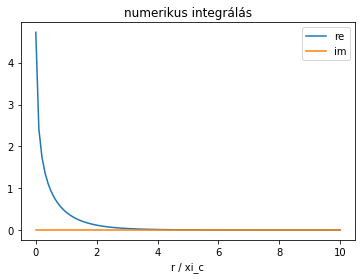

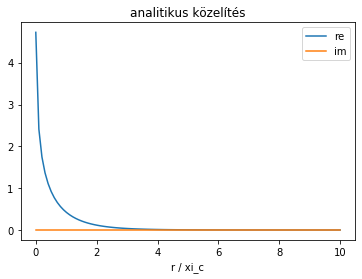

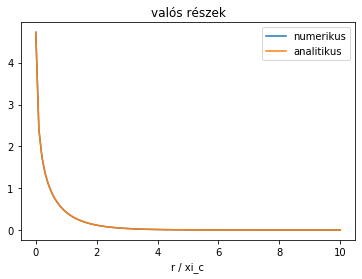

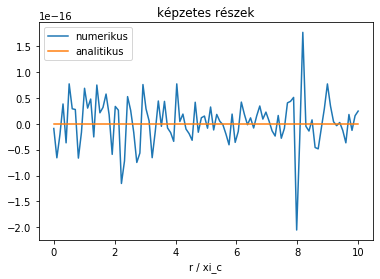

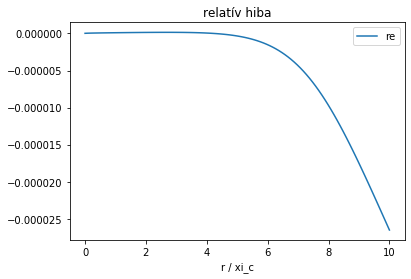

In [13]:
plt.figure(1)
plt.plot(rs / xi_c, F_res_re, label='re')
plt.plot(rs / xi_c, F_res_im, label='im')
plt.legend()
plt.title('numerikus integrálás')
plt.xlabel('r / xi_c')

plt.figure(2)
plt.plot(rs / xi_c, F_approx_res_re, label='re')
plt.plot(rs / xi_c, F_approx_res_im, label='im')
plt.legend()
plt.title('analitikus közelítés')
plt.xlabel('r / xi_c')

plt.figure(3)
plt.plot(rs / xi_c, F_res_re, label='numerikus')
plt.plot(rs / xi_c, F_approx_res_re, label='analitikus')
plt.legend()
# plt.xlim([8, 10])
# plt.xlim([0, 1e-1])
plt.title('valós részek')
plt.xlabel('r / xi_c')

plt.figure(4)
plt.plot(rs / xi_c, F_res_im, label='numerikus')
plt.plot(rs / xi_c, F_approx_res_im, label='analitikus')
plt.legend()
plt.title('képzetes részek')
plt.xlabel('r / xi_c')

plt.figure(5)
plt.plot(rs / xi_c, (F_approx_res_re - F_res_re) / F_res_re, label='re')
# plt.plot(rs / xi_c, (F_approx_res_im - F_res_im) / F_res_im, label='im')
plt.legend()
plt.title('relatív hiba')
plt.xlabel('r / xi_c')

plt.show()

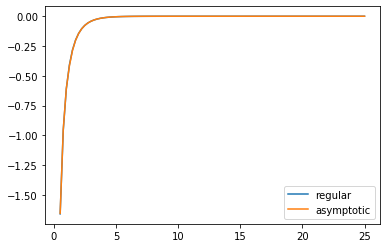

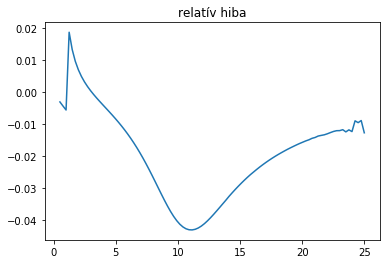

In [14]:
rs = np.linspace(0.5* xi_c, 25 * xi_c, 100)
G = np.imag(G_approx_integral(rs))
G_far = np.imag(G_approx_integral_far(rs))

plt.figure(1)
plt.plot(rs / xi_c, G, label='regular')
plt.plot(rs / xi_c, G_far, label='asymptotic')
plt.legend()

plt.figure(2)
plt.title('relatív hiba')
plt.plot(rs / xi_c, (G_far - G) / G)

plt.show()

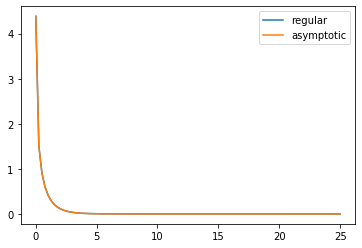

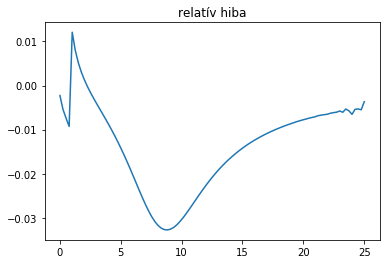

In [15]:
rs = np.linspace(0.01 * xi_c, 25 * xi_c, 100)
F = F_approx_integral(rs)
F_far = F_approx_integral_far(rs)

plt.figure(1)
plt.plot(rs / xi_c, F, label='regular')
plt.plot(rs / xi_c, F_far, label='asymptotic')
plt.legend()

plt.figure(2)
plt.title('relatív hiba')
plt.plot(rs / xi_c, (F_far - F) / F)

plt.show()

In [2]:
delta = 0.0001
w0 = 0.01
EF = 1
m = 1
h_bar = 1
kF = np.sqrt(2*m*EF) / h_bar
xi_c = 2 * EF / (kF * delta)
l_0  = 2 * EF / (kF * h_bar * w0)
print(f'kF   = {kF}')
print(f'l_0  = {l_0}')
print(f'xi_c = {xi_c}')

l_tilde = l_0 / xi_c
print(l_tilde)

kF   = 1.4142135623730951
l_0  = 141.42135623730948
xi_c = 14142.13562373095
0.009999999999999998


In [3]:
from scipy import integrate

def f_body(r_tilde, y):
    return np.exp(-r_tilde * y) * y / np.sqrt(y**2 - 1) / ((y * l_tilde)**4 + 1)

def calc_f(rs):
    result = np.zeros(len(rs))
    for i in range(len(rs)):
        result[i], _ = integrate.quad(lambda y: f_body(rs[i] / xi_c, y), 1, np.inf)
    return result

In [4]:
rs = np.linspace(0 * l_0, 10 * l_0, 1000)
fs = calc_f(rs)

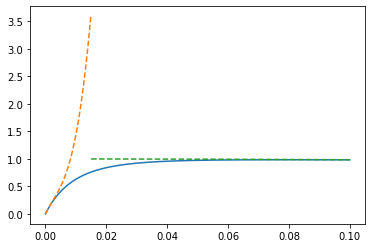

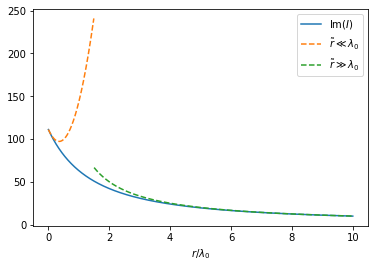

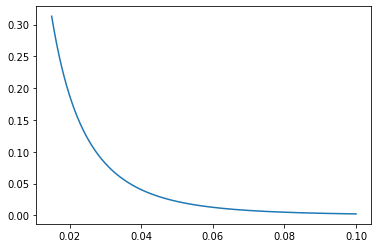

In [6]:
from scipy.special import kn

def plot_regular(xs, ys, *args, **kwargs):
    plt.plot(xs, ys, *args, **kwargs)
def plot_normalized(xs, ys, *pos_args, **kwargs):
    plt.plot(xs, ys * xs, *pos_args, **kwargs)

def upper_bound(rs, val):
    for i in range(len(rs)):
        if rs[i] >= val:
            return i
    return len(rs)

small_rs = rs[:upper_bound(rs, 1.5 * l_0)]
null_order_correction, _  = integrate.quad(lambda y: f_body(0, y), 1, np.inf)
first_order_correction, _ = integrate.quad(lambda y: f_body(0, y) * y, 1, np.inf)
second_order_correction, _ = integrate.quad(lambda y: f_body(0, y) * y*y, 1, np.inf)
small_r_approx = null_order_correction * np.ones(len(small_rs)) - small_rs / xi_c * first_order_correction + (small_rs / xi_c)**2 * second_order_correction

big_rs = rs[upper_bound(rs, 1.5 * l_0):]
big_r_approx = kn(1, big_rs / xi_c)
# big_rs_tilde = big_rs / xi_c
# big_r_approx = np.sqrt(np.pi / 2) * np.exp(-big_rs_tilde) / np.sqrt(big_rs_tilde)

plt.figure(1)
plot_normalized(rs / xi_c, fs)
plot_normalized(small_rs / xi_c, small_r_approx, '--')
plot_normalized(big_rs / xi_c, big_r_approx, '--')

plt.figure(2)
plot_regular(rs / l_0, fs, label=r'$\mathrm{Im}(I)$')
plot_regular(small_rs / l_0, small_r_approx, '--', label=r'$\tilde{r} \ll \lambda_0$')
plot_regular(big_rs / l_0, big_r_approx, '--', label=r'$\tilde{r} \gg \lambda_0$')
plt.legend()
plt.xlabel('$r / \lambda_0$')

plt.savefig("I.pdf", format="pdf", bbox_inches="tight")

plt.figure(3)
big_fs = fs[len(fs) - len(big_rs):]
plot_regular(big_rs / xi_c, (big_r_approx - big_fs) / big_fs)

plt.show()